I) The period of a pendulum of length l oscillating at a large angle $\alpha$ is given by
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^ \frac{1}{2}}
$$
where
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
is the period of the same pendulum at small amplitudes. Any numerical evaluation of the integral as is would fail (explain why). If we change the variable by writing:
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
we can get:
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
which is a well-behaved integral. Write a program to use the above integral to calculate the ratio $T/T_0$ for integral amplitudes $0^\circ \le\alpha \le 90^\circ$. Output these values as a pandas dataframe showing the amplitude in degrees and radians as well as $T/T_0$, and make a plot with the two columns. Explain the result when $\alpha = 0.$ 

Para la integral $$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^ \frac{1}{2}}
$$
Se tiene que cuando $$0\leq\theta\leq\alpha$$
Hay una indeterminación en $$\theta = \alpha$$ y una raiz de un numero negativo para $$0\leq\theta<\alpha$$

In [230]:
import numpy as np
from scipy import integrate
import pandas as pd
import matplotlib.pyplot as plt

In [231]:
#Arreglo con valores para alpha
a = np.linspace(0,np.pi/2) #angulos en radianes
a_deg = a*180/np.pi #angulos en degradanes

In [232]:
#Integracion

#Limites de integracion
l1 = 0
l2 = np.pi/2
#======================

def I(a, l1, l2):
  c = np.sin(0.5*a)
  return integrate.quad(lambda x: 1/(1 - c**2 * np.sin(x)**2)**0.5 , l1, l2)[0]

#Evaluando la integral para cada uno de los angulos alpha
integ = np.zeros(len(a)) #Inicializando arreglo para guardar los valores de la integral

for i in range(0, len(a)):
  integ[i] = I(a[i], l1, l2)


In [233]:
#Calculo de T/T0
TT0 = (2/np.pi)*integ

In [234]:
#Dataframe

df = pd.DataFrame({'Ang Degradanes': a_deg, 'Ang radianes': a, 'T/T0':TT0})
df[:3]

,Ang Degradanes,Ang radianes,T/T0
0,0.000000,0.000000,1.000000
1,1.836735,0.032057,1.000064
2,3.673469,0.064114,1.000257


Cuando el angulo $$ \alpha = 0 $$ se tiene que el periodo es el mismo que para angulos pequeños

Text(0, 0.5, '$Ratio$ $\\dfrac{T}{T_0}$')

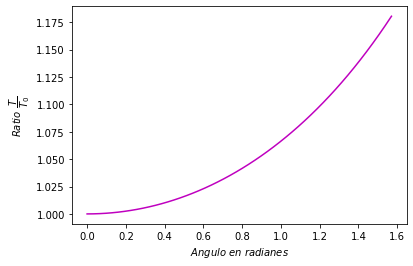

In [235]:
plt.plot(a, TT0,'m-')
plt.xlabel('$Angulo$ $en$ $radianes$')
plt.ylabel('$Ratio$ $\dfrac{T}{T_0}$')

II) 
### Casas-Ibarra parameterization
Consider a $n\times n$ symmetric matrix $A$. We can assumme without lost of generality that this can be generated from a matrix $Y$ such that
$$
A=Y^{\operatorname{T}}Y
$$
Theorem 1 gurantees that exists an ortogonal matrix $U$ such that
$$
U^{\operatorname{T}} A U=U^{\operatorname{T}} Y^{\operatorname{T}}Y U=D_\lambda
$$
where
$$
D_{\lambda}=A_{\text{diag}}=\operatorname{diag}\left(\lambda_1,\lambda_2,\ldots,\lambda_n\right)
$$
where $\lambda_i$ are the eigenvalues of $A$. Therefore
\begin{align}
 Y^{\operatorname{T}}Y =&U D_\lambda U^{\operatorname{T}}\\
 =&U D_{\sqrt{\lambda}} D_{\sqrt{\lambda}} U^{\operatorname{T}}\\
\end{align}
where
$$
D_{\sqrt{\lambda}}=\operatorname{diag}\left(\sqrt{\lambda_1},\sqrt{\lambda_2},\ldots \sqrt{\lambda_n}\right)
$$
Therefore, exists an ortogonal arbitrary matrix $R$, such that
$$
 Y^{\operatorname{T}}Y =U D_{\sqrt{\lambda}}R^{\operatorname{T}}R D_{\sqrt{\lambda}} U^{\operatorname{T}}\\
$$

In this way, the matrix $Y$ can be parameterized in terms of $R$ as
$$
Y=R D_{\sqrt{\lambda}} U^{\operatorname{T}}
$$


1) By using the previous equations, build a matrix $Y$ $2\times 2$ with the following conditions
* $R$ is an orthogonal matrix with a mixing angle as a random number between $(0,2\pi)$. Use your identification number as the seed of the random number generator.
* The eigenvalues are $\lambda_1=2$ and $\lambda_2=4$. 
* $U$ is a diagonalization matrix with mixing angle $\pi/4$

2) Build the matrix $A$ and check that has the proper eigenvalues and eigenvectors

In [224]:
import sympy as sp
sp.init_printing()

In [ ]:
#Angulo de  mezcla
np.random.seed(1001010600) 
mg = np.random.uniform(0,2*np.pi)
mg

5.767929832007462

In [262]:
#Definicion de las diferentes matrices

D = np.diag([2,4]) #Matriz de autovalores
Droot = np.sqrt(D) #Matriz de la raiz de los autovalores

U = np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)],[np.sin(np.pi/4), np.cos(np.pi/4)]])
R = np.array([[np.cos(mg), -np.sin(mg)],[np.sin(mg), np.cos(mg)]])

In [263]:
#Calculando Y
Y = np.dot( R, np.dot(Droot, np.transpose(U)) )
sp.Matrix(Y)

⎡0.173302989085499  1.56703073786081 ⎤
⎢                                    ⎥
⎣-1.72335895099484  0.737844608707952⎦

In [264]:
#Calculando A
A = np.dot(np.transpose(Y), Y)
sp.Matrix((A))

⎡3.0   -1.0⎤
⎢          ⎥
⎣-1.0  3.0 ⎦

In [285]:
#Hallando autovalores y autovectores de A
E, e = np.linalg.eig(A)

In [277]:
#Autovalores
sp.Matrix(np.diag(E) )

⎡4.0  0.0⎤
⎢        ⎥
⎣0.0  2.0⎦

In [267]:
#Autovectores
sp.Matrix(e.round(7))

⎡0.7071068   0.7071068⎤
⎢                     ⎥
⎣-0.7071068  0.7071068⎦

In [280]:
np.dot(e,np.dot(np.diag(E), e.transpose()))

array([[ 3., -1.],
       [-1.,  3.]])